In [2]:
#ch07_01_MLP.ipynb

In [3]:
#1.以keras建立 Multilayer perceptron,(多層感知器)模型
#2.訓練模型、評估模型準確率
#3.以訓練完成的模型辨識 MNIST 手寫數字

In [4]:
#step1 讀取並預處理資料

In [5]:
#step1.1 匯入所需模組, keras.utils.np_utils
from keras.utils import np_utils
import numpy as np

/Users/vivianvivi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#step1.1.a 將亂數種子固定
np.random.seed(10)

In [7]:
#step1.2 從keras.dataset 讀取 mnist 資料集
from keras.datasets import mnist

In [8]:
#step1.2.1 以mnist.load_data() method 讀取資料,(train/test)
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

11493376/11490434 [==============================] - 32s 3us/step


In [9]:
#step1.3 將features(28x28 數字影像特徵值) reshape 為 1 dimension array (784),並轉換為float
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [10]:
#step1.4 將1.3的features標準化 (0.0~255.0)-->(0.0~1.0)
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [12]:
#step1.5 將label值(0,1,~9) One-hot encoding 編碼, 使用 np_utils.to_categorical() method
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=  np_utils.to_categorical(y_test_label)

In [13]:
#=======================================================================================

In [14]:
#step2. 建立MLP模型, 輸入層(x),784個神經元;  隱藏層(h),256個神經元; 輸出層(y),10個神經元 

In [15]:
#step2.1 或入所需模組 keras.model.Sequentail, keras.layers.Dense
from keras.models import Sequential
from keras.layers import Dense

In [26]:
#step2.2 建立一個 Sequential model 's_model'
#        The core data structure of Keras is a model, a way to organize layers.
#        The simplest type of model is the Sequential model, a linear stack of layers. 
s_model=Sequential()  #Linear stack of layers.

In [27]:
#step2.3 建立輸入層(x)及隱藏層(h), 以Sequential.add() method, 加入 Dense神經網路層
#        Dense() 函數 實作 h=relu(x*w1+b1) 隱藏層
s_model.add(Dense(units=1000,                      #設定隱藏層神經元個數256
                 input_dim=784,                   #設定輸入層神經元個數784
                 kernel_initializer='normal',     #使用 normal distribution 亂數,初始化 weight及bias
                 activation='relu'))              #activation function 'relu'

In [28]:
s_model.add(Dense(units=1000,                      #設定隱藏層神經元個數256
                 input_dim=1000,                   #設定輸入層神經元個數784
                 kernel_initializer='normal',     #使用 normal distribution 亂數,初始化 weight及bias
                 activation='relu')) 

In [29]:
#step2.4 建立「輸出層」,使用Sequential.add() , Dense()
#        輸出層 activattion function 使用 softmax
#        Dense() 函數 實作 y=softmax(h1*w2+b2) 輸出層 
s_model.add(Dense(units=10,                      #設定輸出層神經元個數為10
                 kernel_initializer='normal',    #使用 normal distribution 亂數,初始化 weight及bias
                 activation='softmax'))          #activation function 'softmax'


In [30]:
#step2.5 檢視 Sequential model 's_model' 的摘要
print(s_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
#====================================================================
#建立深度學習模型後，就可以使用反向傳播演算法(Back Propagation)進行訓練
#step3. 進行訓練

In [31]:
#step3.1 定義訓練方式
#        以 Sequential.compile(), 設定模型訓練方式
#        Compilation:
#        Before training a model, you need to configure the learning process, 
#        which is done via the compile method. It receives three arguments:
#            1.An optimizer.      (設定訓練時的優化方法, 如adam)
#            2.A loss function.   (設定損失函數, 如 cross_entropy)
#            3.A list of metrics. (設定評估模型的方式, 如 accuracy)
s_model.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])


In [32]:
#step3.2 開始訓練, 以Sequential.fit() 
train_history=s_model.fit(x=x_Train_normalize,                 #feature 數字影像標準化值
                         y=y_Train_OneHot,validation_split=0.2, #lebel One-Hot encoding 值
                         epochs=10,batch_size=200,verbose=2)   #epochs, 訓練週期為 10

train_history_2=s_model.fit(x=x_Train_normalize,                 #feature 數字影像標準化值
                         y=y_Train_OneHot,validation_split=0.2, #lebel One-Hot encoding 值
                         epochs=10,batch_size=200,verbose=2)   #epochs, 訓練週期為 10

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.2275 - acc: 0.9324 - val_loss: 0.1130 - val_acc: 0.9668
Epoch 2/10
 - 8s - loss: 0.0763 - acc: 0.9769 - val_loss: 0.0933 - val_acc: 0.9722
Epoch 3/10
 - 9s - loss: 0.0453 - acc: 0.9855 - val_loss: 0.1011 - val_acc: 0.9696
Epoch 4/10
 - 8s - loss: 0.0279 - acc: 0.9907 - val_loss: 0.0755 - val_acc: 0.9772
Epoch 5/10
 - 8s - loss: 0.0186 - acc: 0.9942 - val_loss: 0.0920 - val_acc: 0.9763
Epoch 6/10
 - 8s - loss: 0.0167 - acc: 0.9946 - val_loss: 0.0933 - val_acc: 0.9758
Epoch 7/10
 - 8s - loss: 0.0168 - acc: 0.9948 - val_loss: 0.0973 - val_acc: 0.9768
Epoch 8/10
 - 8s - loss: 0.0129 - acc: 0.9957 - val_loss: 0.0932 - val_acc: 0.9772
Epoch 9/10
 - 8s - loss: 0.0150 - acc: 0.9947 - val_loss: 0.1011 - val_acc: 0.9770
Epoch 10/10
 - 8s - loss: 0.0157 - acc: 0.9946 - val_loss: 0.0934 - val_acc: 0.9786
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 0.0092 - acc: 0.9969 - val_loss: 0.1052 - va

In [33]:
#step3.3 顯示(繪圖)訓練過程
#        讀取 train_history 中 loss 與 accuracy, 繪圖
import matplotlib.pyplot as plt
def show_train_history_2(train_history_2,train,validation):  #define a function 'show_train_history'
    plt.plot(train_history_2.history[train])              #train_history.history 是一個 dict
    plt.plot(train_history_2.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    


In [34]:
train_history.history.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

In [35]:
#step3.4 畫出 accuracy 執行結果, 使用 show_train_history
%matplotlib inline
show_train_history(train_history,'acc','val_acc')

NameError: name 'show_train_history' is not defined

In [24]:
#到目前為止，我們只是以 (x_train_image,y_train_label) (60000筆),依8:2 (train(8):test(2)) 做訓練模型評估
#後續, 我們會以另組獨立資料 (x_test_image,y_test_label) (10000筆) 評估模型準確率

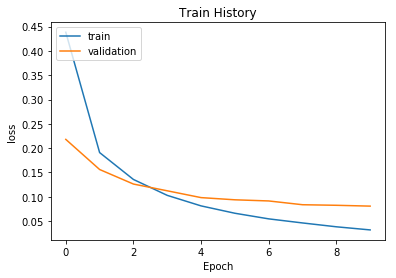

In [25]:
#step3.5 畫出 loss 誤差值
show_train_history(train_history,'loss','val_loss')

In [26]:
#step4. 以獨立的 10000 筆測試資料 (x_test_image,y_test_label) 評估模型準確率
#       使用 Sequential.evaluate() method
score=s_model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',score[1])

10000/10000 [==============================] - 2s 184us/step

accuracy= 0.9763


In [51]:
s_model.evaluate?

In [27]:
#===============================================================================
#以上, 我們 1.建立了模型, 2.完成模型訓練, 3.也評估過模型的準確率
#接下來, 我們使用此模型進行預測

In [28]:
#step5. 預測

In [29]:
#step5.1 執行預測, 使用Sequential.predict_classes() method
#        參數為 x_Test (step1.3), 並將結果存放於 prediction
prediction=s_model.predict_classes(x_Test)

In [30]:
#step5.2 檢視預測結果
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
#step5.3 顯示預測結果
#step5.3.a 建立看多筆資料函數 plot_images_labels_prediction()
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf() 
    fig.set_size_inches(12,14)      #設定顯示圖形為12"x14" 
    if num>25: num=25               #如果顯示筆數大於25,就設定為25
    for i in range(0,num):          #畫出num個數字圖形
        ax=plt.subplot(5,5,1+i)     #subplot(nrows, ncols, plot_number), plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols.
        ax.imshow(images[idx], cmap='binary') #show 第 [idx] 個 images, colormap='binary'
        title="label="+str(labels[idx])       #此一subplot抬頭為對應的label值
        if len(prediction)>0:                      #如果呼叫此函數時,有給定預測值prediction (a list)
            title+=",predit="+str(prediction[idx]) #   在抬頭加上對應的預測值 prediction[idx]
        
        ax.set_title(title,fontsize=10)  #設定subplot ax 的 title
        ax.set_xticks([]);ax.set_yticks([]) #set_xticks(ticks, minor=False), Set the x ticks with list of ticks, 此處[]為不設定刻度
        idx+=1
    plt.show()  

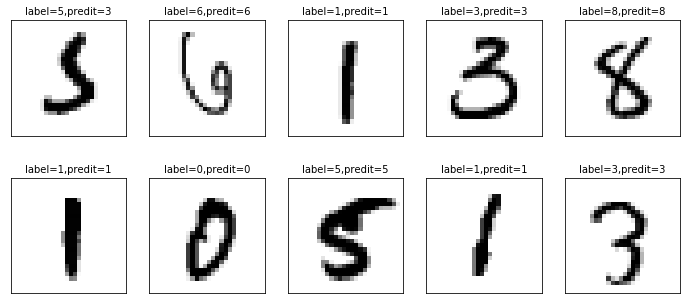

In [32]:
#step5.3.b 以 images=x_test_image, labels=y_test_label, prediction=prediction, idx=340, num=10
#          檢視第 340 以後 10 筆資料
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=10)

In [33]:
#step6. 顯示混淆矩陣 (confusion matrix or error matrix)
#       使用 pandas crosstab

In [34]:
#step6.1 使用 pandas crosstab 建立 counusion matrix
import pandas as pd
pd.crosstab(y_test_label,prediction,
           rownames=['labels'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,972,0,1,1,0,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1010,1,1,0,2,4,8,0
3,0,0,4,992,0,1,0,4,5,4
4,2,0,5,1,960,0,3,0,3,8
5,3,0,0,16,1,853,7,1,8,3
6,5,3,1,1,3,3,940,0,2,0
7,0,5,11,6,1,0,0,991,5,9
8,4,0,3,7,1,1,1,2,954,1


In [35]:
#step6.2 建立真實 label 與 預測 predict dataframe 'df'
df=pd.DataFrame({'label':y_test_label,'predict':prediction})

In [36]:
df.head(5) #檢視 df 前 5 筆

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [37]:
#step6.3 以布林陣列 查詢 label=5, 但 predic=3
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4255,5,3
4271,5,3


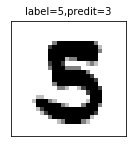

In [38]:
#step6.4 查看第 1003 筆, 看為什麼錯?
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1003,num=1)